In [1]:
import os
import sys
sys.path.insert(0, "/home/aidin/Documents/tum_courses/internship/scarches")

In [2]:
import scarches as sca
import scanpy as sc

In [3]:
train = sc.read("../tests/data/pancreas.h5ad") # Read and load the training dataset (AnnData object)

/home/aidin/.virtualenvs/scgen_env/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/aidin/.virtualenvs/scgen_env/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


### Reading the  train data

In [4]:
#train = sc.read("./tests/data/pancreas.h5ad",
               # backup_url="https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1")

We need two observation labels "batch" and "cell_type" for our batch_removal procedure.
There exist a "batch" obs but no "cell_type", 
so we add it as a .obs of adata

In [5]:
train.obs["cell_type"] = train.obs["celltype"].tolist()

### UMAP Visualization of the  original uncorrected data  

In [6]:
sc.pp.neighbors(train)
sc.tl.umap(train)

... storing 'cell_type' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


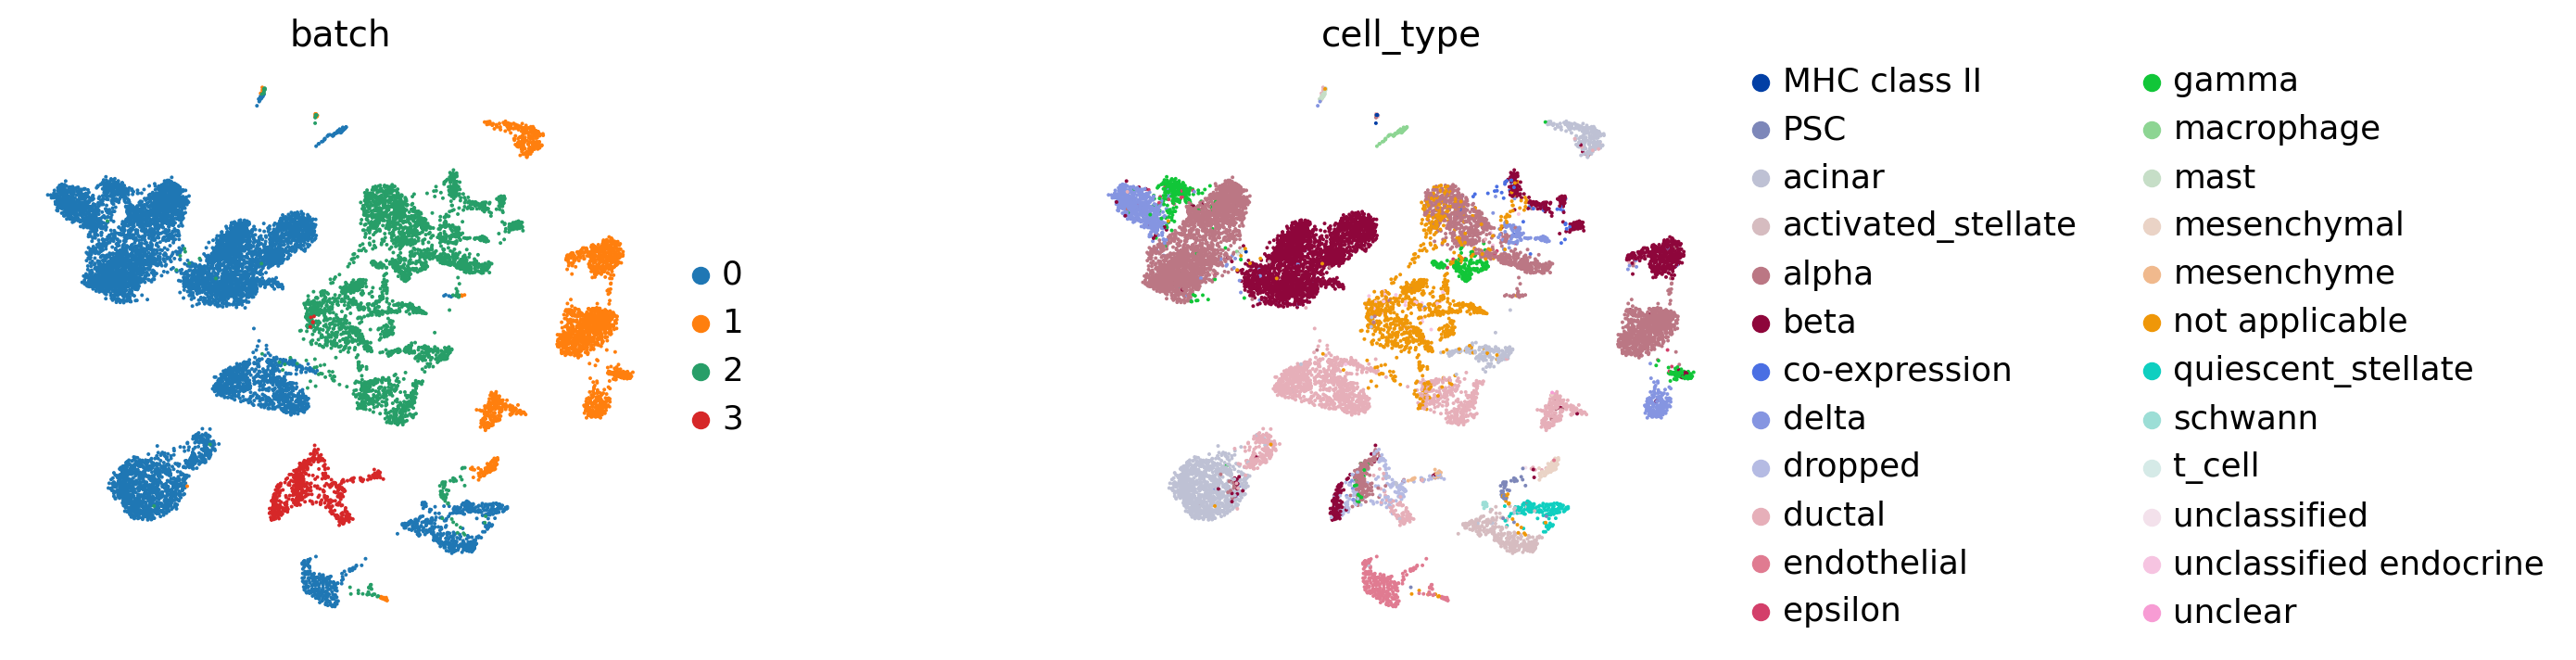

In [7]:
sc.pl.umap(train, color=["batch", "cell_type"], wspace=.5, frameon=False)

### Creating and training the model

In [8]:
network = sca.models.VAEARITH(adata = train, 
                              z_dimension = 100, 
                              hidden_layer_sizes = [800,800], 
                              dr_rate=0.2)

Encoder Architecture:
	Input Layer in, out: 2448 800
	Hidden Layer 1 in/out: 800 800
	Mean/Var Layer in/out: 800 100
Decoder Architecture:
	First Layer in, out 100 800
	Hidden Layer 1 in/out: 800 800
	Output Layer in/out:  800 2448 



We train the model for 100 epochs 

In [9]:
network.train(n_epochs = 100)

/home/aidin/.virtualenvs/scgen_env/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Epoch: 0. Train Loss: 0.6872580542034653 Validation Loss: 0.6807011364268608
[0.6797762707523678]
Epoch: 1. Train Loss: 0.6704181795770062 Validation Loss: 0.6656725565592448
[0.6797762707523678, 0.6647681101508762]
Epoch: 2. Train Loss: 0.65784564015004 Validation Loss: 0.6549206895893123
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485]
Epoch: 3. Train Loss: 0.6513354685071611 Validation Loss: 0.6493156562857076
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238]
Epoch: 4. Train Loss: 0.6446402561355357 Validation Loss: 0.6438951401483445
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969]
Epoch: 5. Train Loss: 0.6395718094116709 Validation Loss: 0.6400926940295161
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499]
Epoch: 6. Train Loss: 0.6346641480810008 Validation Loss: 0.6362504517950979
[0.6797762707523678, 0.6647681101508762

Epoch: 25. Train Loss: 0.6084502023331816 Validation Loss: 0.6180026729090684
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355]
Epoch: 26. Train Loss: 0.6072333325851453 Validation Loss: 0.6169879420273969
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860

Epoch: 37. Train Loss: 0.6006906466558717 Validation Loss: 0.6134106519270917
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211]
Epoch: 38. Train Loss: 0.6004553690788236 Validation Loss: 0.6136351844891399
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020

Epoch: 46. Train Loss: 0.5967223184656684 Validation Loss: 0.6118471054803758
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.61101

Epoch: 54. Train Loss: 0.5937726339521814 Validation Loss: 0.61062857050474
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.6110157

Epoch: 61. Train Loss: 0.5913700389941395 Validation Loss: 0.6096282310226336
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.61101

Epoch: 68. Train Loss: 0.5902554436944522 Validation Loss: 0.6095275995682697
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.61101

Epoch: 74. Train Loss: 0.5888521059156411 Validation Loss: 0.6090190128404267
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.61101

Epoch: 80. Train Loss: 0.5879254860046059 Validation Loss: 0.6088784094570445
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.61101

Epoch: 85. Train Loss: 0.5871626297085925 Validation Loss: 0.608818076256992
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.611015

Epoch: 90. Train Loss: 0.5857963257655248 Validation Loss: 0.6080997713569071
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.61101

Epoch: 95. Train Loss: 0.5854765218333596 Validation Loss: 0.6083166667393276
[0.6797762707523678, 0.6647681101508762, 0.6540308516958485, 0.6484334339266238, 0.643020282620969, 0.6392230028691499, 0.6353859810725503, 0.6337438666302225, 0.6311415770779485, 0.6292216492735822, 0.6277255117893219, 0.6267160669617031, 0.6252251215603041, 0.6249688215877699, 0.623282930125361, 0.6222484280233798, 0.6217860709065977, 0.6208044122094694, 0.6202928903310195, 0.6206854607747949, 0.6185000098269918, 0.618492902620979, 0.6177654849446338, 0.6172417279170908, 0.617153459916944, 0.617162995364355, 0.6161496431931205, 0.6163170091483904, 0.6155017808727596, 0.6157544417225796, 0.6141536358905875, 0.614355408627054, 0.6142137724420299, 0.6132340586703756, 0.6124667603036632, 0.6129559304403223, 0.6127098649740219, 0.6125772135413211, 0.6128014410319536, 0.6122299329094265, 0.6116351809190668, 0.6119373576796573, 0.6112549337355987, 0.6118894491506659, 0.6107966478752054, 0.6114122368719267, 0.61101

In [10]:
dir_path = os.path.expanduser(f'/home/aidin/Documents/tum_courses/internship/')
ref_path = f'{dir_path}_ref_model_batch_removal/'
if not os.path.exists(ref_path):
    os.makedirs(ref_path)
network.save(ref_path, overwrite=True)

### Batch Removal

Now, we pass our train (uncorected) adata and network object to batch_removal fucntion which
returns adata of batch corrected data

In [11]:
corrected_adata =  sca.models.scgen.util.batch_removal(network, train, batch_key="batch", cell_label_key="cell_type")

###  Visualization of the  corrected gene expression data

In [12]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'celltype' as categorical
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical


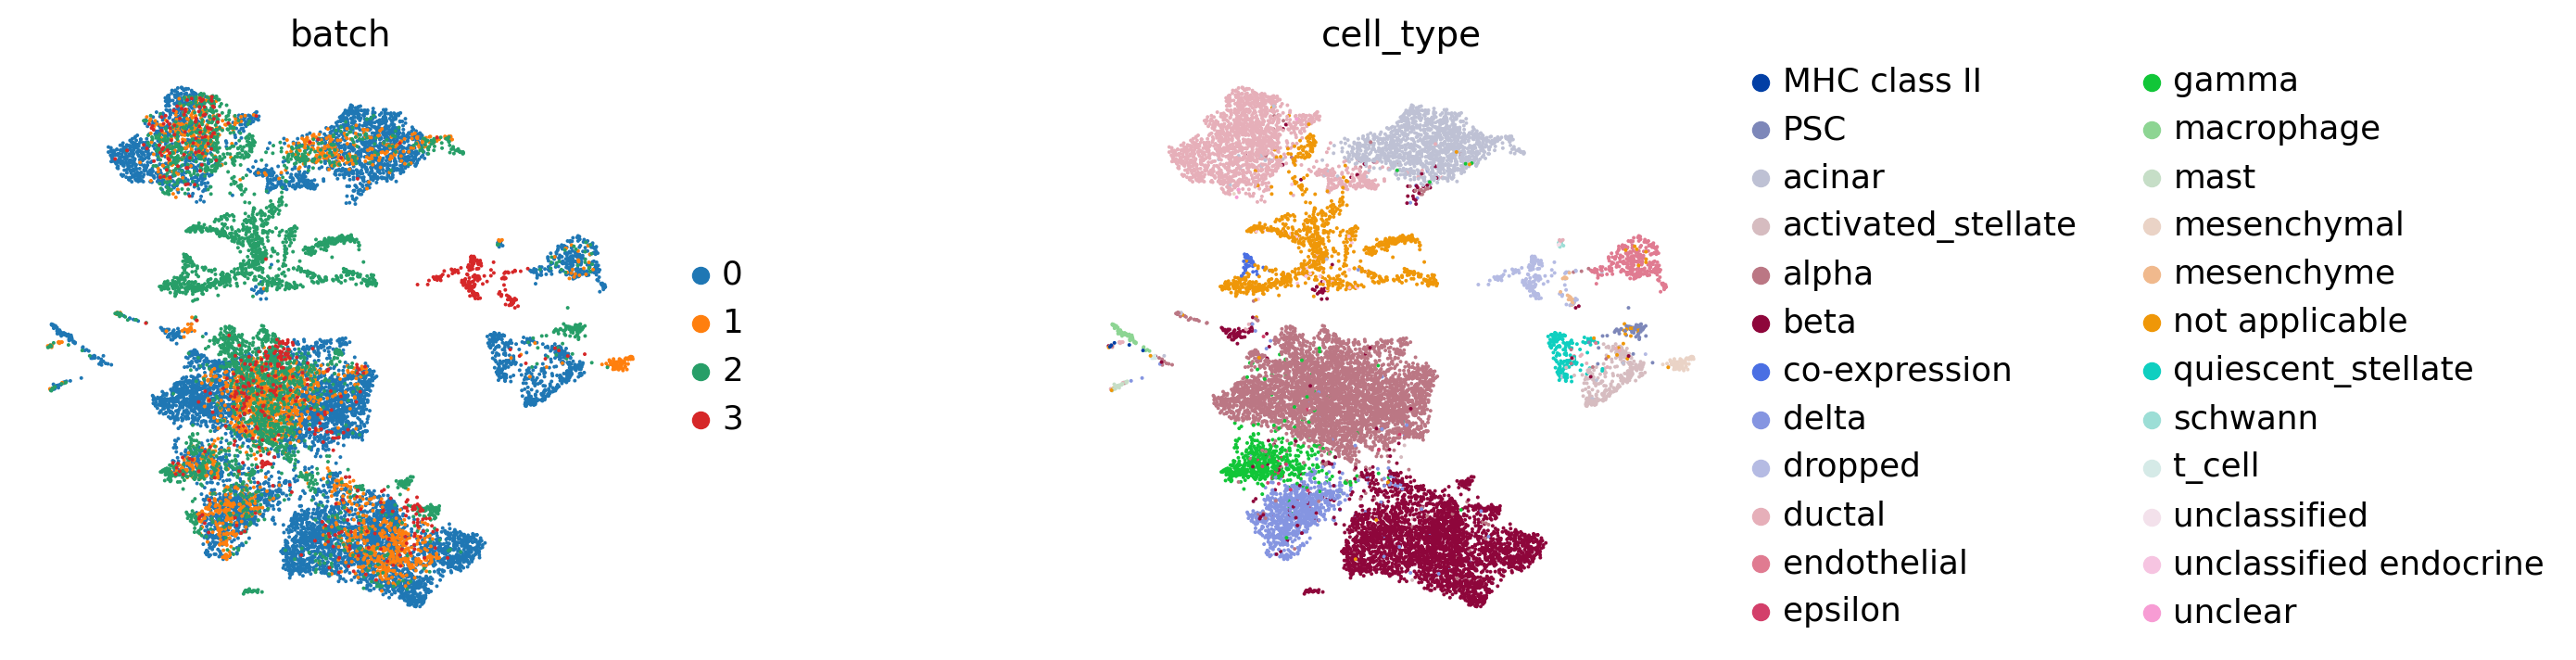

In [13]:
sc.pl.umap(corrected_adata, color=["batch", "cell_type"], wspace=.5, frameon=False)

###  Using uncorrected data

Note that original  `adata.raw` for the adata.raw is saved to `corrected_adata.raw` and you can use that for fruther analaysis

In [14]:
corrected_adata.raw

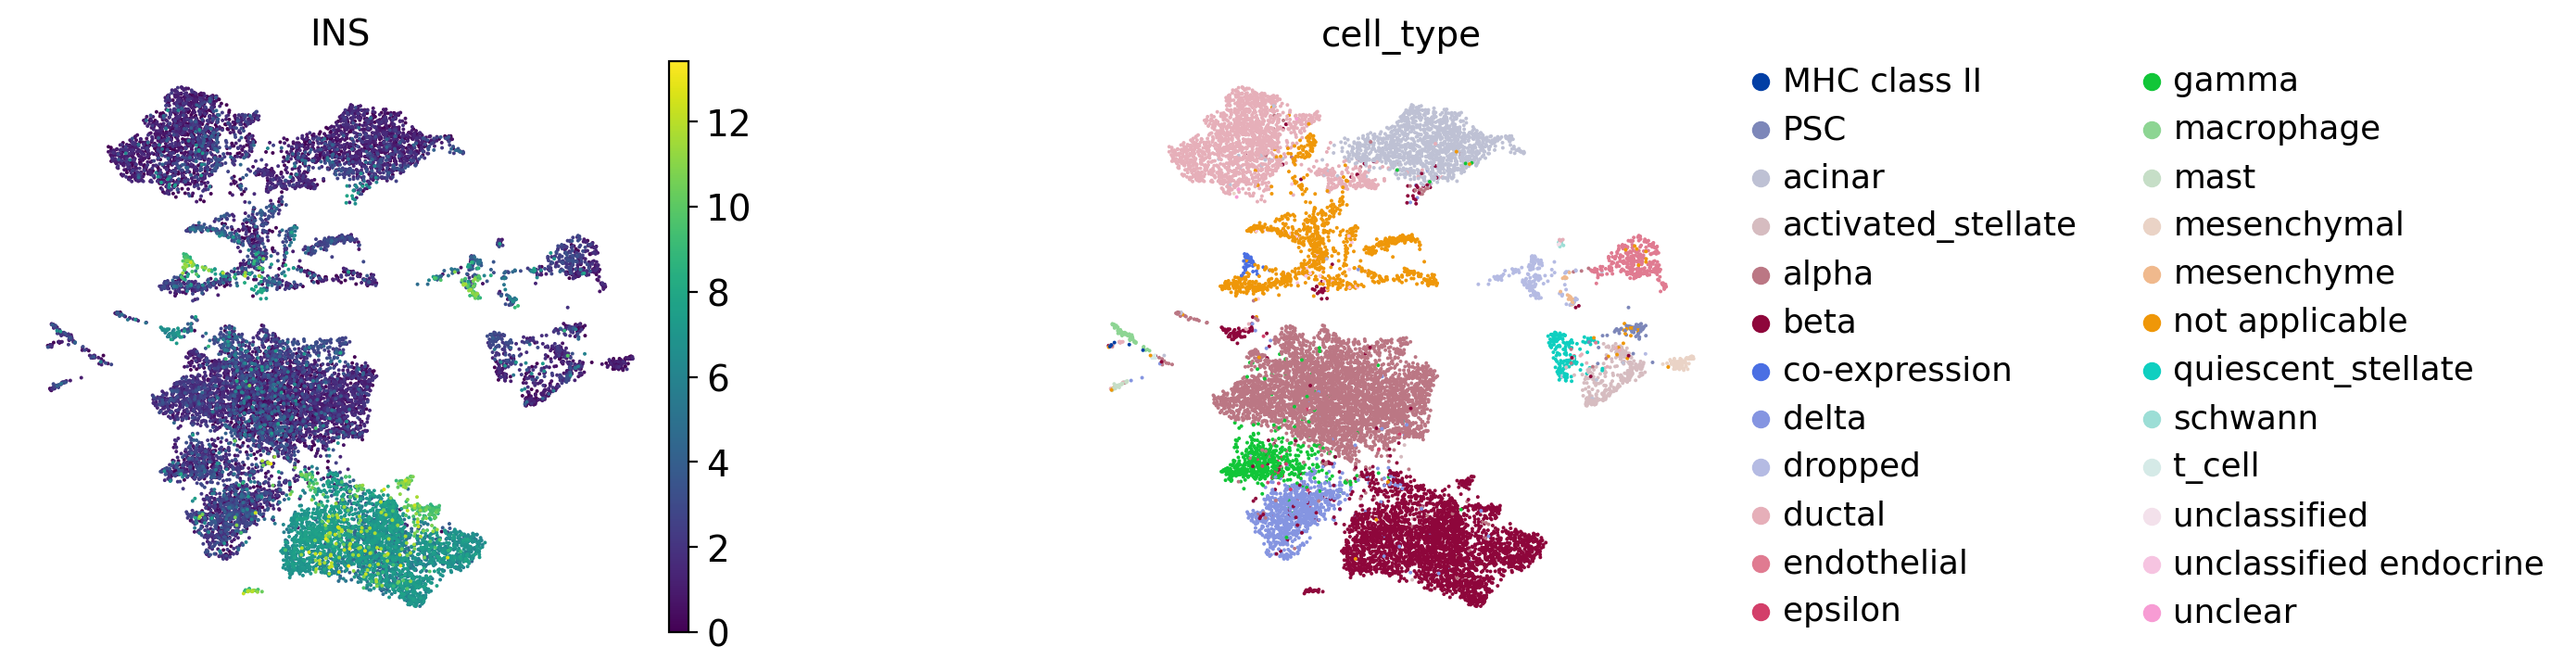

In [15]:
sc.pl.umap(corrected_adata, color=["INS", "cell_type"], wspace=.5, frameon=False, use_raw=True)